### Datos temporales con Xarray

---


En este notebook vamos a ver como manejar y representar datos temporales en Python.  

Vamos a usar principalmente dos paquetes:
1. [`Pandas`](https://pandas.pydata.org/docs/index.html)
2. [`Xarray`](https://docs.xarray.dev/en/stable/index.html#).

En este tutorial veremos el caso de `Xarray` para datos temporales en 3 o más dimensiones.

Siguiendo el ejemplo de Charles, aquí podemos instalar pandas y xarray en caso de no tenerlas:

**Xarray**

pip install xarray

**Pandas**

pip install pandas

### Importar liberías

In [ ]:
import numpy as np 
import pandas as pd 
import xarray as xr 
import matplotlib.pyplot as plt  
from matplotlib.dates import date2num, num2date, datetime
import cmocean as cmo
import subprocess
import scipy.stats as sstat
from scipy.interpolate import UnivariateSpline
import seaborn as sns


In [40]:
print("Rango de latitudes:", sst.latitude.min().values, "a", sst.latitude.max().values)
print("Rango de longitudes:", sst.longitude.min().values, "a", sst.longitude.max().values)
print("ROI solicitado:", roi)

Rango de latitudes: -89.375 a 89.625
Rango de longitudes: 0.375 a 359.375
ROI solicitado: [8, 23, 271, 300]


In [42]:
roi

[8, 23, 271, 300]

### Abrir archivo NetCDF con `Xarray`

---

In [59]:
roi = [8,33,-117+360,-85+360] # region de interés 
ds = xr.open_dataset('data/ERA5_Coarse.nc')
sst = ds.sst
sst = sst - 273.15 # convertiendo a Celsius de Kelvin
sst = sst.sel(latitude=slice(roi[1],roi[0]), longitude=slice(roi[2],roi[3]))
#sst = sst.squeeze()
#sst.plot()

### Mapa de TSM global de la primera capa temporal del NetCDF (1959-01-01)

---

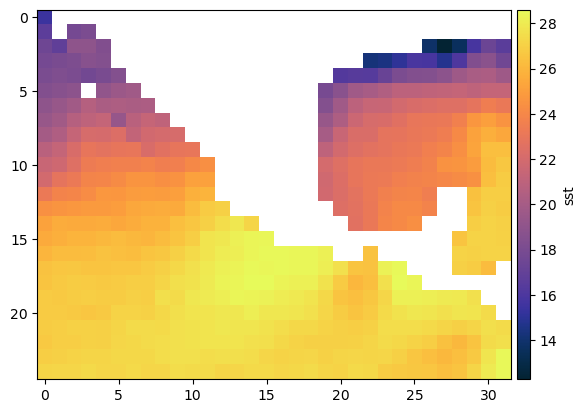

In [60]:
cmap = cmo.cm.thermal
fig, ax = plt.subplots()
image = plt.imshow(sst[0],cmap=cmap)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,0.02, ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)
cbar.set_label('sst') 
plt.show()

#### Mapa de TSM media

---

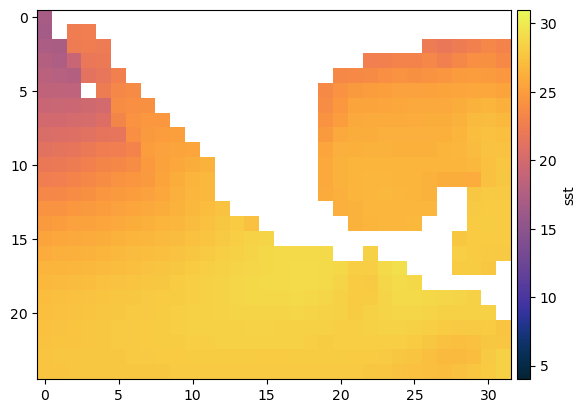

In [61]:
sst_mean = sst.mean(dim='time') 
fig, ax = plt.subplots()
image = plt.imshow(sst_mean,cmap=cmap,vmin=4,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)
cbar.set_label('sst') 
plt.show()

### Seleccionar datos para años específicos

---

In [63]:
# Seleccionar un año concreto
print(sst.sel(time='1965').squeeze().time.values)
# Seleccionar un periodo concreto
print(sst.sel(time=slice('1965','1995')).time.values)
# Seleccionar un mes concreto
print(sst.isel(time=(sst.time.dt.month == 1)).time.values)

1965-09-01T00:00:00.000000000
['1965-09-01T00:00:00.000000000' '1969-01-01T00:00:00.000000000'
 '1972-05-01T00:00:00.000000000' '1975-09-01T00:00:00.000000000'
 '1979-01-01T00:00:00.000000000' '1982-05-01T00:00:00.000000000'
 '1985-09-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1992-05-01T00:00:00.000000000' '1995-09-01T00:00:00.000000000']
['1959-01-01T00:00:00.000000000' '1969-01-01T00:00:00.000000000'
 '1979-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000']


### Agrupar por mes

---

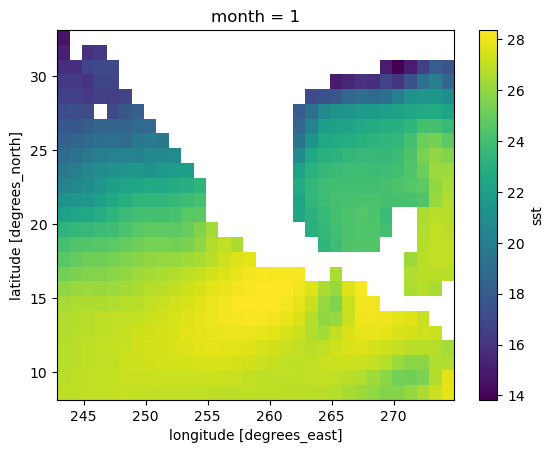

In [72]:
sst.groupby("time.month") # Lo que significa es que tenemos datos de los meses 1, 5 y 9
#sst.groupby("time.year")
sst.groupby("time.month").mean().sel(month=1).plot(); # Así graficamos los datos del mes

### Agrupar por estación

---

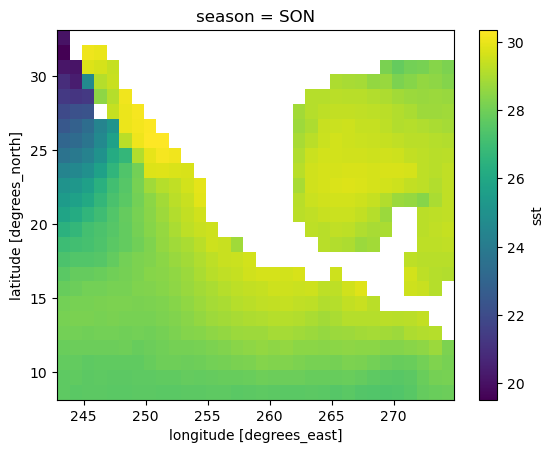

In [71]:
sst.groupby("time.season").mean().isel(season=2).plot();

### Función resample

---

In [73]:
sst.resample(time='1YE').mean() # 'S' usa el inicio del año, y 'E' el final

<xarray.DataArray 'sst' (time: 61, latitude: 25, longitude: 32)> Size: 390kB
array([[[15.43694278,         nan,         nan, ...,         nan,
                 nan,         nan],
        [16.63696362,         nan, 17.77837162, ...,         nan,
                 nan,         nan],
        [17.45384156, 16.81218517, 19.00245457, ..., 15.84476477,
         17.32119144, 16.54688494],
        ...,
        [26.70294818, 26.91518837, 26.89667905, ..., 26.53204547,
         27.42913046, 27.5747371 ],
        [26.93184676, 26.9960124 , 27.08300619, ..., 26.69616143,
         27.80116777, 28.51994631],
        [27.18357349, 27.224294  , 27.2458882 , ..., 27.18357349,
         27.99983445, 28.528584  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[15.08835061,         nan,         nan, ...,         nan,
                 nan,         nan],
        [15.74481445,         nan, 16.18471926, ...,         nan,
                 nan,         nan],
        [16.62770896, 16.42657436, 17.39893058, ..., 16.28898843,
         17.95667805, 17.14103407],
        ...,
        [26.97935401, 27.07930433, 27.13236438, ..., 26.13471209,
         27.0990476 , 26.6208902 ],
        [27.07128363, 27.15642649, 27.19591304, ..., 26.57214899,
         27.68517603, 28.40395458],
        [27.22799586, 27.2594617 , 27.28105591, ..., 28.07942453,
         28.47367302, 28.74267512]]], shape=(61, 25, 32))
Coordinates:
  * latitude   (latitude) float32 100B 32.62 31.62 30.62 ... 10.62 9.625 8.625
  * longitude  (longitude) float32 128B 243.4 244.4 245.4 ... 272.4 273.4 274.4
  * time       (time) datetime64[ns] 488B 1959-12-31 1960-12-31 ... 2019-12-31

In [74]:
sst.resample(time='1MS').mean().time # ¿En qué se diferencia de groupby?

<xarray.DataArray 'time' (time: 721)> Size: 6kB
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      shape=(721,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2019-01-01
Attributes:
    long_name:  time

### Grafica la SST media (anual) en el periodo

---

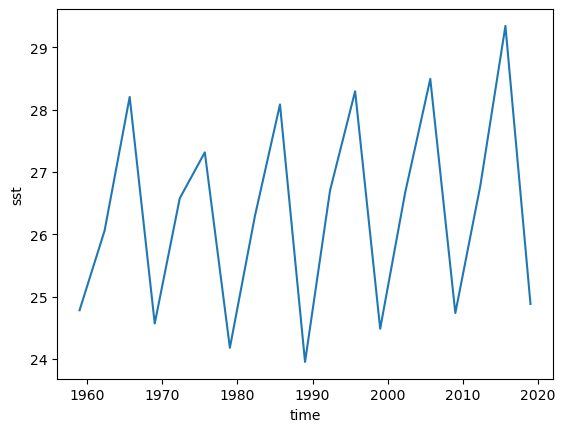

In [77]:
sst_media = sst.mean(dim=['latitude','longitude'])
sst_media.plot();

### La media ponderada (tiene en cuenta el tamaño de cada pixel)

---

In [89]:
try:
    sst.to_netcdf('data/sst.nc')
    result = subprocess.run(["cdo", "gridarea", 'data/sst.nc', 'data/sst_grid.nc'],capture_output=True, text=True, check=True)
    if result.returncode == 0:
        print("CDO ejecutado exitosamente")
except subprocess.CalledProcessError as e:
    print(f"Error en CDO: {e.stderr}")
except Exception as e:
    print(f"Error: {e}")
          


CDO ejecutado exitosamente


In [90]:
sst_area = xr.open_dataset("data/sst_grid.nc")
areacello = (sst_area.cell_area * sst[0].notnull())
w = areacello/areacello.sum()

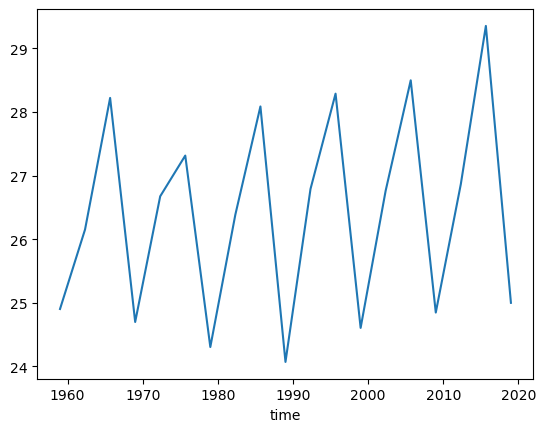

In [91]:
sst_media_pond = (sst * w).sum(dim=['latitude','longitude'])
sst_media_pond.plot();

### Suavizar la serie temporal

---

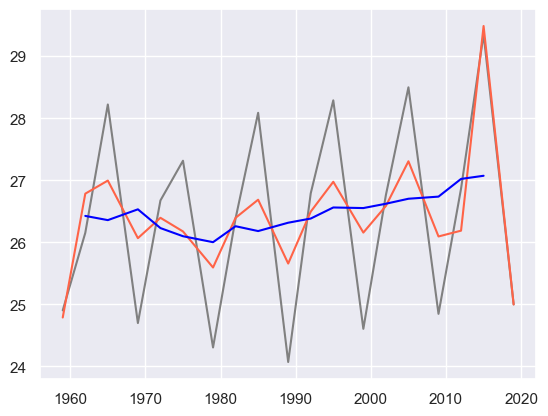

In [ ]:
xs = sst_media_pond.time.dt.year # vector of time in years
movavg_sst_media_pond = sst_media_pond.rolling(time=3,center=True).mean() #Elijo 3 ya que cada punto se diferencia unos 3 años
# Otros métodos que exigen interpolación: ejemplo de la Spline
# Creating a spline regression model of current Tmax
spl_sst_media_pond = UnivariateSpline(xs, sst_media_pond.values,k=4)  # 4 Degrees of freedom
fig, ax = plt.subplots()
plt.plot(xs,sst_media_pond,'grey')
plt.plot(xs,spl_sst_media_pond(xs),'tomato')
plt.plot(xs,movavg_sst_media_pond,'blue')
plt.show()

### Gráfica con Seaborn

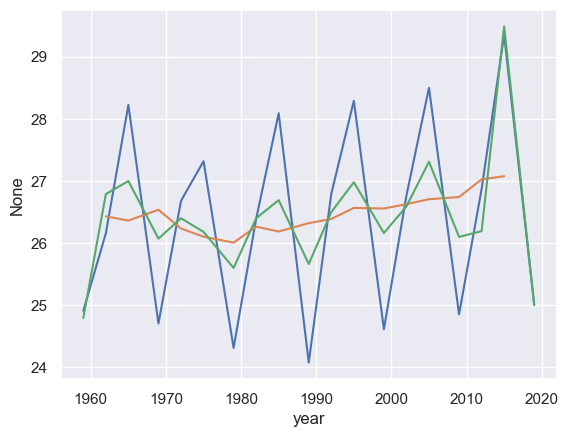

In [96]:
sns.set_theme(style="darkgrid")
sns.lineplot(y=sst_media_pond,x=xs)
sns.lineplot(y=movavg_sst_media_pond,x=xs)
sns.lineplot(y=spl_sst_media_pond(xs),x=xs);

### Crear dataframe con pandas y graficar

In [ ]:
values = {'sst_media_pond': sst_media_pond,
          'movavg_sst_media_pond': movavg_sst_media_pond,
          'spl_sst_media_pond': spl_sst_media_pond(xs),
         }
df = pd.DataFrame(values,index=xs)
df.head()
fig, ax = plt.subplots()
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, palette="tab10", linewidth=2.5,)
plt.ylabel('ºC')
plt.show()

,sst_media_pond,movavg_sst_media_pond,spl_sst_media_pond
1959,24.903490,NaN,24.788504
1962,26.153133,26.426042,26.784502
1965,28.221503,26.358021,26.995645
1969,24.699426,26.531984,26.067281
1972,26.675024,26.229889,26.395442
